___
<h1> Machine Learning </h1>
<h2> Systems Engineering and Computer Technologies / Engenharia de Sistemas e Tecnologias Informáticas
(LESTI)</h2>
<h3> Instituto Superior de Engenharia / Universidade do Algarve </h3>

[LESTI](https://ise.ualg.pt/curso/1941) / [ISE](https://ise.ualg.pt) / [UAlg](https://www.ualg.pt)

Pedro J. S. Cardoso (pcardoso@ualg.pt)

___

# Classification metrics

The majority of the ML frameworks provide a set of metrics to evaluate the performance of a model. The metrics are usually grouped into two categories: classification and regression metrics. Let us for now focus on the classification metrics.

https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [1]:
# Importing libraries to predict and evaluate a KNN model for the breast cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Importing metrics to evaluate the model
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# Importing matplotlib to plot the confusion matrix
import matplotlib.pyplot as plt

## Dataset
The dataset we are going to use is the breast cancer dataset.

The breast cancer dataset is a classic and very easy binary classification
    dataset.

    =================   ==============
    Classes                          2
    Samples total                  569
    Dimensionality                  30
    Features            real, positive
    =================   ==============

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [2]:
# load the breast cancer dataset
cancer_data = load_breast_cancer()

# print a description of it
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

The features values are the following

In [3]:
cancer_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

And the target values are 0 / 1

In [4]:
cancer_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Now, let us split the dataset into training and test sets. This will take care of the shuffling and stratification of the data. The test set will be 25% of the total data and later we will use it to evaluate the model.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    cancer_data.data, # features
    cancer_data.target, # target
    stratify=cancer_data.target, # stratify the data according to the target values
    shuffle=True, # shuffle the data before splitting
    test_size=0.25, # 25% of the data will be used for testing
    random_state=42 # random state for reproducibility
)

A very simple but effective model is the KNN (K-Nearest Neighbors). The KNN model is a non-parametric model, which means that it does not make any assumption about the data distribution. The KNN model is a lazy learner, which means that it does not learn a model from the training data but instead memorizes the training data.

For the purpose of this example, we will use the KNN model with 3 neighbors. This means that the model will look at the 3 nearest neighbors to predict the class of a new data point.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [6]:
knn = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train) # create and fit the model
y_pred = knn.predict(x_test) # predict the test data
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

The score of the model is the accuracy, which is the number of correct predictions divided by the total number of predictions. So, 0.93 accuracy means that 93% of the predictions were correct.

In [7]:
knn.score(x_test, y_test)

0.9300699300699301

## Metrics:  accuracy_score, f1_score, confusion_matrix

Let us now evaluate the model using the test data. We will use the following metrics: accuracy, f1-score, precision, recall and confusion matrix.

Acuracy is the number of correct predictions divided by the total number of predictions.
$$ accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

Precision is the number of correct positive predictions divided by the total number of positive predictions.
$$ precision = \frac{TP}{TP + FP}$$

Recall is the number of correct positive predictions divided by the total number of positive samples.
$$ recall = \frac{TP}{TP + FN}$$

F1-score is the harmonic mean of precision and recall.
$$ F1 = 2 \frac{precision \times recall}{precision + recall}$$

Where TP is the number of true positives, TN is the number of true negatives, FP is the number of false positives and FN is the number of false negatives.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [8]:
metrics = (confusion_matrix, accuracy_score, f1_score,  precision_score, recall_score)

for m in metrics:
    print("-------------> ", m.__qualname__)
    print(m(y_test, y_pred))
    print()

------------->  confusion_matrix
[[47  6]
 [ 4 86]]

------------->  accuracy_score
0.9300699300699301

------------->  f1_score
0.945054945054945

------------->  precision_score
0.9347826086956522

------------->  recall_score
0.9555555555555556



## Report
The classification report is a summary of the metrics for each class. It is useful to evaluate the performance of the model for each class.
See the documentation for more details.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

In [9]:
from sklearn.metrics import classification_report
report = classification_report(
    y_test, 
    y_pred,
    target_names=cancer_data.target_names
) 
print(report)

              precision    recall  f1-score   support

   malignant       0.92      0.89      0.90        53
      benign       0.93      0.96      0.95        90

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143



## Confusion matrix
The confusion matrix is a table that shows the number of correct and incorrect predictions for each class. The rows represent the actual class and the columns represent the predicted class. The diagonal of the matrix represents the correct predictions and the off-diagonal elements represent the incorrect predictions.

The confusion matrix for our example is the following:

In [10]:
cm = confusion_matrix(y_test, y_pred)

The confusion matrix can be plotted using the plot_confusion_matrix function allowing to visualize the confusion matrix using a color map.

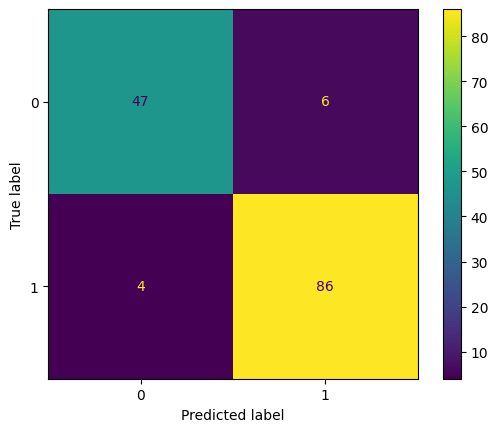

In [11]:
ConfusionMatrixDisplay(cm).plot()


# Exercises

Go to the [Exercises/06-metrics-analysis-exercises.ipynb](Exercises/06-metrics-analysis-exercises.ipynb) notebook.